In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.incomp_utils import *


plt.style.use('seaborn-whitegrid')
# PLOT PREAMBLE: LIKE LATEX
LATEX_WIDTH = 2.8
LATEX_HEIGHT = 3.24

SCRIPT_SIZE = 7

#Direct input
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : SCRIPT_SIZE,
          'axes.labelsize' : SCRIPT_SIZE,
          'xtick.labelsize' : SCRIPT_SIZE,
          'ytick.labelsize' : SCRIPT_SIZE,
          'legend.fontsize' : SCRIPT_SIZE,
          'figure.titlesize' : SCRIPT_SIZE,
          'font.family' : 'serif',
          'font.serif': ['Computer Modern Roman']
          }
plt.rcParams.update(params)

# Example of compatible Gaussian conditionals

In [2]:
M = np.array([[0, 4, -0.5], [4, 0, 0], [-0.5, 0, -0.5]])

sequence = PGS(x_0=0, y_0=0, update_x=lambda y: update_x_normal(y, M),
               update_y=lambda x: update_y_normal(x, M),
               N=3000)
sequence_xy, sequence_yx = split_sequence(sequence=sequence[::2], burn_in=100)

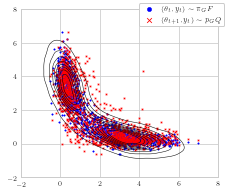

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

sns.kdeplot(x=sequence[:, 0], y=sequence[:, 1], color='black', linewidths=.5, ax=ax)
ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='o',
            c='blue',
            label=r'$\left(\theta_{t}, y_{t}\right)\sim\pi_GF$')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='red',
            label=r'$\left(\theta_{t+1}, y_{t}\right)\sim p_GQ$')

# Axes
ax.set_xticks(np.arange(-2, 9, 2))
ax.set_yticks(np.arange(-2, 9, 2))
ax.set_xlim([-2, 8])
ax.set_ylim([-2, 8])

fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('../fig/compatible.pdf')
plt.show()

# Example of incompatible Gaussian conditional distributions

In [4]:
def update_incomp(y):
    """Draw x given y.

    Args:
        y: value to condition on.

    Returns:
        x: one draw from the specified conditional.
    """
    mu_y = y/2
    sigma_y = np.sqrt(1) / (1+y**2)
    x = np.random.normal(mu_y, sigma_y)
    return x

In [5]:
# NOTE THAT THE SAME CONDITIONAL update_incomp IS USED FOR BOTH x AND Y
# This means that the conditionals are both normal again
sequence = PGS(x_0=0, y_0=0, update_x=update_incomp,
               update_y=update_incomp,
               N=5000)
sequence_xy, sequence_yx = split_sequence(sequence=sequence, burn_in=100)

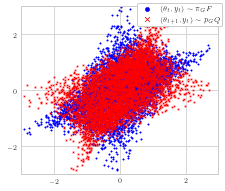

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(LATEX_WIDTH, .85*LATEX_WIDTH)
plt.subplots_adjust(top = .99, bottom=.01, left=.01, right=.99, hspace=.05, wspace=.05)

ax.scatter(sequence_xy[:, 0], sequence_xy[:, 1],
            s=2,
            linewidths=.5,
            marker='o',
            c='blue',
            label=r'$\left(\theta_{t}, y_{t}\right)\sim\pi_GF$')
ax.scatter(sequence_yx[:, 0], sequence_yx[:, 1],
            s=2.5,
            linewidths=.8,
            marker='x',
            c='red',
            label=r'$\left(\theta_{t+1}, y_{t}\right)\sim p_GQ$')

# Axes
ax.set_xticks(np.arange(-2, 3, 2))
ax.set_yticks(np.arange(-2, 3, 2))
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

fig.legend(framealpha=1, frameon=True, markerscale=3)
plt.savefig('../fig/incompatible.pdf')
plt.show()